In [17]:
import numpy as np
from to_RGB import to_rgb

def rgb_to_8_bit(three_channel_tensor):
    pred_array = np.asarray(three_channel_tensor)
    
    return np.argmax(pred_array, axis=2)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pathlib import Path

needle_path_1 = r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\needles\image.png"
needle_path_2 = r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\needles\Rs_m004.png"
needle_path_3 = r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\needles\Rs_m006.png"

script_path_1 = r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\script\org_10nbr_2_upscaled_chinese_gaussian.png"
script_path_2 = r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\script\org_0nbr_9_upscaled_chinese_gaussian.png"
script_path_3 = r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\script\org_3nbr_8_upscaled_chinese_gaussian.png"

In [3]:
needle_1 = Image.open(needle_path_1)
needle_2 = Image.open(needle_path_2)
needle_3 = Image.open(needle_path_3)

script_1 = Image.open(script_path_1)
script_2 = Image.open(script_path_2)
script_3 = Image.open(script_path_3)

In [4]:
needle_arr_1 = np.asarray(needle_1)
needle_arr_2 = np.asarray(needle_2)
needle_arr_3 = np.asarray(needle_3)

script_arr_1 = np.asarray(script_1)
script_arr_2 = np.asarray(script_2)
script_arr_3 = np.asarray(script_3)

In [5]:
needle_arr_1 = needle_arr_1[:1432, :]
needle_arr_2 = needle_arr_2[:1790, :]
needle_arr_3 = needle_arr_3[:1790, :]

img = Image.fromarray(needle_arr_1)
img = img.resize((2560, 1790), Image.Resampling.NEAREST)

needle_arr_1 = np.asarray(img)
print(np.unique(needle_arr_1))

[  0 255]


In [6]:
print(np.unique(needle_arr_1))

[  0 255]


In [7]:
needle_arr_1 = needle_arr_1 // needle_arr_1.max()
needle_arr_2 = needle_arr_2 // needle_arr_2.max()
needle_arr_3 = needle_arr_3 // needle_arr_3.max()
 
script_arr_1 = script_arr_1 // script_arr_1.max()
script_arr_2 = script_arr_2 // script_arr_2.max()
script_arr_3 = script_arr_3 // script_arr_3.max()

print(np.unique(needle_arr_1))

[0 1]


In [8]:
raw1 = needle_arr_1 + script_arr_1
raw2 = needle_arr_2 + script_arr_2
raw3 = needle_arr_3 + script_arr_3

print(np.unique(raw1))

raw1 = (raw1 > 0).astype(int)
raw2 = (raw2 > 0).astype(int)
raw3 = (raw3 > 0).astype(int)

print(np.unique(raw1))
print(np.unique(raw2))
print(np.unique(raw3))

[0 1 2]
[0 1]
[0 1]
[0 1]


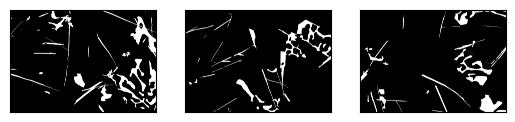

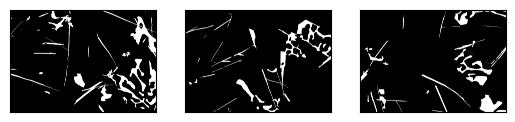

In [9]:
raw1_255 = (raw1 * 255).astype(np.uint8)
raw2_255 = (raw2 * 255).astype(np.uint8)
raw3_255 = (raw3 * 255).astype(np.uint8)

fig, axarr = plt.subplots(1, 3)

flat = axarr.flatten()

flat[0].imshow(raw1_255, cmap = "Greys_r")
flat[1].imshow(raw2_255, cmap = "Greys_r")
flat[2].imshow(raw3_255, cmap = "Greys_r")

for ax in flat:
    ax.set_xticks([])
    ax.set_yticks([])

fig

In [10]:
img1 = Image.fromarray(raw1_255)
img2 = Image.fromarray(raw2_255)
img3 = Image.fromarray(raw3_255)

img1.save(r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\raw\raw1.png")
img2.save(r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\raw\raw2.png")
img3.save(r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\raw\raw3.png")

In [11]:
script_arr_1 = script_arr_1 * 2
script_arr_2 = script_arr_2 * 2
script_arr_3 = script_arr_3 * 2

In [22]:
def to_rgb(array):
    img = np.zeros((1790, 2560, 3))

    red_channel = (array == 0).astype(np.uint8) * 0
    green_channel = (array == 1).astype(np.uint8) * 255
    blue_channel = (array == 2).astype(np.uint8) * 255

    img[:, :, 0] = red_channel
    img[:, :, 1] = green_channel
    img[:, :, 2] = blue_channel

    return img

In [13]:
label1 = needle_arr_1 + script_arr_1
label2 = needle_arr_2 + script_arr_2
label3 = needle_arr_3 + script_arr_3

label1_overlap = (label1 == 3)
label2_overlap = (label2 == 3)
label3_overlap = (label3 == 3)

label1 = label1 - label1_overlap
label2 = label2 - label2_overlap
label3 = label3 - label3_overlap

label1_overlap = (label1_overlap // 3) * 2 
label2_overlap = (label2_overlap // 3) * 2
label3_overlap = (label3_overlap // 3) * 2

label1 = label1 + label1_overlap
label2 = label2 + label2_overlap
label3 = label3 + label3_overlap

label1_rgb = to_rgb(label1).astype(np.uint8)
label2_rgb = to_rgb(label2).astype(np.uint8)
label3_rgb = to_rgb(label3).astype(np.uint8)

In [14]:
img1 = Image.fromarray(label1_rgb)
img2 = Image.fromarray(label2_rgb)
img3 = Image.fromarray(label3_rgb)

img1.save(r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\label\label1.png")
img2.save(r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\label\label2.png")
img3.save(r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\label\label3.png")

Calculate class weights

In [4]:
path = r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\label"
folder = Path(path)

nbr_classes = 3

nbr_background_pixels = 0
nbr_needle_pixels = 0
nbr_script_pixels = 0

for file in folder.iterdir():
    img = Image.open(file)
    arr = np.asarray(img)
    counts = np.unique(arr, return_counts = True)[1]
    nbr_background_pixels += counts[0]
    nbr_needle_pixels += counts[1]
    nbr_script_pixels += counts[2]

total_pixels = nbr_background_pixels + nbr_needle_pixels + nbr_script_pixels

background_weight = total_pixels / (nbr_classes * nbr_background_pixels)
needle_weight = total_pixels / (nbr_classes * nbr_needle_pixels)
script_weight = total_pixels / (nbr_classes * nbr_script_pixels)

print(f"Background weight: {background_weight:>4f}, Needle weight: {needle_weight:>4f}, Script weight: {script_weight:>4f}")

Background weight: 0.356657, Needle weight: 30.526744, Script weight: 6.119014


In [37]:
path = r"C:\Users\magfa\Documents\Master\Masteroppgave\machine_learning\predictions\synthetic_dataset_2_from_scratch_with_class_weights_and_momentum\3.png"
path2 = r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\label\17.png"

img = Image.open(path)
img2 = Image.open(path2)

arr = np.asarray(img)
arr2 = np.asarray(img2)

print(arr.shape)
print(arr2.shape)

(2560, 1790, 3)
(1790, 2560)


In [38]:
eight_bit_arr = rgb_to_8_bit(arr).astype(np.uint8)

print(np.unique(eight_bit_arr, return_counts = True))
print(np.unique(arr2, return_counts = True))

(array([0, 1, 2], dtype=uint8), array([4337014,   44086,  201300], dtype=int64))
(array([0, 1, 2], dtype=uint8), array([4341101,   75340,  165959], dtype=int64))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


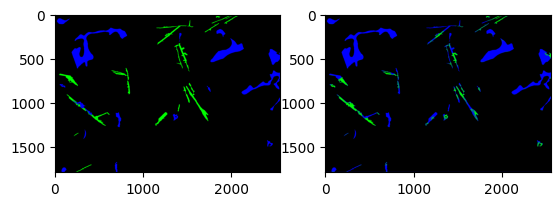

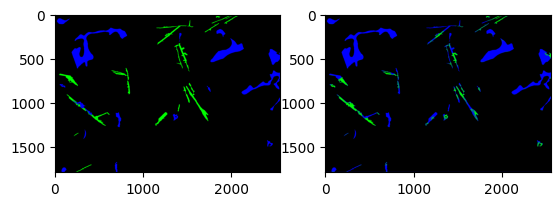

In [39]:
rgb_prediction = to_rgb(eight_bit_arr.T)

fig, axarr = plt.subplots(1, 2)

axarr[0].imshow(to_rgb(arr2))
axarr[1].imshow(to_rgb(eight_bit_arr.T))

fig

In [40]:
img = Image.fromarray(rgb_prediction.astype(np.uint8))

img.save(r"C:\Users\magfa\Documents\Master\Masteroppgave\dataset_generation\script and needles\temp\with_momentum_3.png")